##Barcelona Airbnb Data Analysis 

In this project we are going to analyze the Barcelona Airbnb Data, that can be found on:  http://insideairbnb.com/get-the-data.html

There is multiple datasets in the page. But we are intersted by listing.csv which present a listing of housing in barcelona.


We will follow CRISP-DM (Cross-industry standard process for data mining). It's an open standard process model and has six phases that describes common approaches used for data mining.
The step for a data science project are:

1) Business Understanding

2) Data Understanding

3) Data Preparation/ Wrangling

4) Data Modeling

5) Evaluation
 
6) Deployment

**Questions**

We will try to answer these questions:

1- What are the most popular AirBNB Houses in Barcelona?

2- Pricing analysis: Most expansive and least expansive Neighbourhood in barcelona?

3- Seasonal analysis: How increase/decrease price by season?

## Buisness Understanding

Barcelona is a beauiful city, every years people come for tourism. Airbnb is a good option. So We want to explore the data for Barcelona Airbnb data in order to find the best location and best price for next trip to barcelona. 

##Data Understanding##

In [1]:
#import independencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#read listing dataset
listings_df = pd.read_csv('/content/drive/MyDrive/udacity_projects/project1/listings.csv')
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,157,1,21,2019-11-01,0.22,21,27
1,23197,Forum CCIB DeLuxe★Spacious &Elegant ★Large Bal...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,52,2019-12-15,0.42,2,359
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2020-02-22,0.53,5,0
3,34241,Private Double room - Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38062,2.17517,Private room,50,30,8,2013-07-15,0.06,2,0
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,243,4,149,2020-03-11,1.16,2,114


In [3]:
#getting info about listing dataset
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18226 entries, 0 to 18225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18226 non-null  int64  
 1   name                            18215 non-null  object 
 2   host_id                         18226 non-null  int64  
 3   host_name                       17687 non-null  object 
 4   neighbourhood_group             18226 non-null  object 
 5   neighbourhood                   18226 non-null  object 
 6   latitude                        18226 non-null  float64
 7   longitude                       18226 non-null  float64
 8   room_type                       18226 non-null  object 
 9   price                           18226 non-null  int64  
 10  minimum_nights                  18226 non-null  int64  
 11  number_of_reviews               18226 non-null  int64  
 12  last_review                     

In [4]:
#show some statistics about numerical values
listings_df[['reviews_per_month','number_of_reviews','calculated_host_listings_count','price','minimum_nights','availability_365']].describe()

,reviews_per_month,number_of_reviews,calculated_host_listings_count,price,minimum_nights,availability_365
count,12560.000000,18226.000000,18226.000000,18226.000000,18226.000000,18226.000000
mean,0.916842,31.571601,15.663009,110.391968,12.290135,175.077911
std,1.094043,63.896632,30.699142,429.069933,29.085228,141.168304
min,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.140000,0.000000,1.000000,35.000000,1.000000,2.000000
50%,0.480000,3.000000,3.000000,55.000000,3.000000,179.000000
75%,1.340000,32.000000,14.000000,103.000000,30.000000,318.000000
max,14.070000,808.000000,164.000000,11500.000000,1124.000000,365.000000


In [5]:
#read calendar dataset
calendar_df = pd.read_csv("/content/drive/MyDrive/udacity_projects/project1/calendar.csv")
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,18674,2021-04-13,f,$157.00,$157.00,3.0,1125.0
1,268022,2021-04-14,f,$187.00,$187.00,1.0,365.0
2,268022,2021-04-15,f,$187.00,$187.00,1.0,365.0
3,268022,2021-04-16,f,$218.00,$218.00,32.0,365.0
4,268022,2021-04-17,f,$218.00,$218.00,32.0,365.0


In [6]:
#getting some info
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4765745 entries, 0 to 4765744
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 254.5+ MB


we can see that price is an object type and date is not a datetime type.

##Data Preparation/ Wrangling

Let's handle the missing and categorical values.

In [7]:
#show null values in listing
listings_df.isna().sum() 

id                                   0
name                                11
host_id                              0
host_name                          539
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5666
reviews_per_month                 5666
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [8]:
#show null values in calendar
calendar_df.isna().sum() 

listing_id          0
date                0
available           0
price             355
adjusted_price    356
minimum_nights    695
maximum_nights    695
dtype: int64

**How to handle the missing values?**

One option for handling missing data is to remove the rows with the missing values.
Second option is to impute the mean of a column.
Third option is to build models that work around them, and only use the information provided.

in this situation, features which contain null values are: name, host_name and last review.
For "reviews_per_month" we can 
For other features, we can drop the columns because we think that we will no need them for this study.

In [9]:
#drop some columns
listings_df.drop(['name','host_name','last_review'],axis=1,inplace = True) 
listings_df

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,18674,71615,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,157,1,21,0.22,21,27
1,23197,90417,Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,3,52,0.42,2,359
2,32711,135703,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,0.53,5,0
3,34241,73163,Ciutat Vella,el Barri Gòtic,41.38062,2.17517,Private room,50,30,8,0.06,2,0
4,34981,73163,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,243,4,149,1.16,2,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18221,49155035,64805231,Sants-Montjuïc,Sants,41.37949,2.13099,Private room,22,32,0,NaN,26,348
18222,49155115,64805231,Sants-Montjuïc,Sants - Badal,41.37811,2.12925,Private room,22,32,0,NaN,26,348
18223,49155172,64805231,Sants-Montjuïc,Sants,41.37998,2.13097,Private room,22,32,0,NaN,26,349
18224,49155456,8964574,Nou Barris,Ciutat Meridiana,41.46193,2.17569,Private room,18,30,0,NaN,3,107


In [11]:
# fill null values with mean
listings_df['reviews_per_month']=listings_df['reviews_per_month'].fillna((listings_df['reviews_per_month'].mean()))

In [12]:
# let's check if there more null values
listings_df.isna().sum() 

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

For calendar_df there is some missing values but i think the number of this values is low so we can drop them

In [13]:
#drop rows with null values
calendar_df=calendar_df.dropna()

In [14]:
# let's check if there more null values
calendar_df.isna().sum() 

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

**Convert "date" in calendar dataset to datetime**

Here we make sure that the all the dates are in the same format and we create a column only with years because we will group the data by year.

In [15]:
calendar_df['date']=pd.to_datetime(calendar_df['date'])

**Convert "price" in calendar dataset to numeric**

In [16]:
calendar_df['price']=calendar_df['price'].str.replace('$','')
calendar_df['price']=calendar_df['price'].str.replace(',','')
calendar_df['price']=calendar_df['price'].apply(pd.to_numeric)

In [17]:
#Let's check if 'price' and 'date' have changed
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4764695 entries, 0 to 4765743
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 290.8+ MB


##4- Data Modeling

We do not use Machine Learning models as we do not need it for answering our questions.

## 5- Evaluation

**1- What are the most popular AirBNB Houses in Barcelona?**

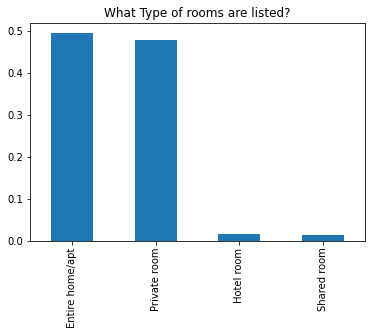

In [18]:
# explore the room type options
room_type = listings_df.room_type.value_counts()

(room_type/listings_df.shape[0]).plot(kind="bar");
plt.title("What Type of rooms are listed?");

In [19]:
neighbourhood_group = listings_df.neighbourhood_group.value_counts()
neighbourhood_group

Eixample               6245
Ciutat Vella           4191
Sants-Montjuïc         2163
Sant Martí             1827
Gràcia                 1517
Sarrià-Sant Gervasi     768
Horta-Guinardó          592
Les Corts               380
Sant Andreu             286
Nou Barris              257
Name: neighbourhood_group, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

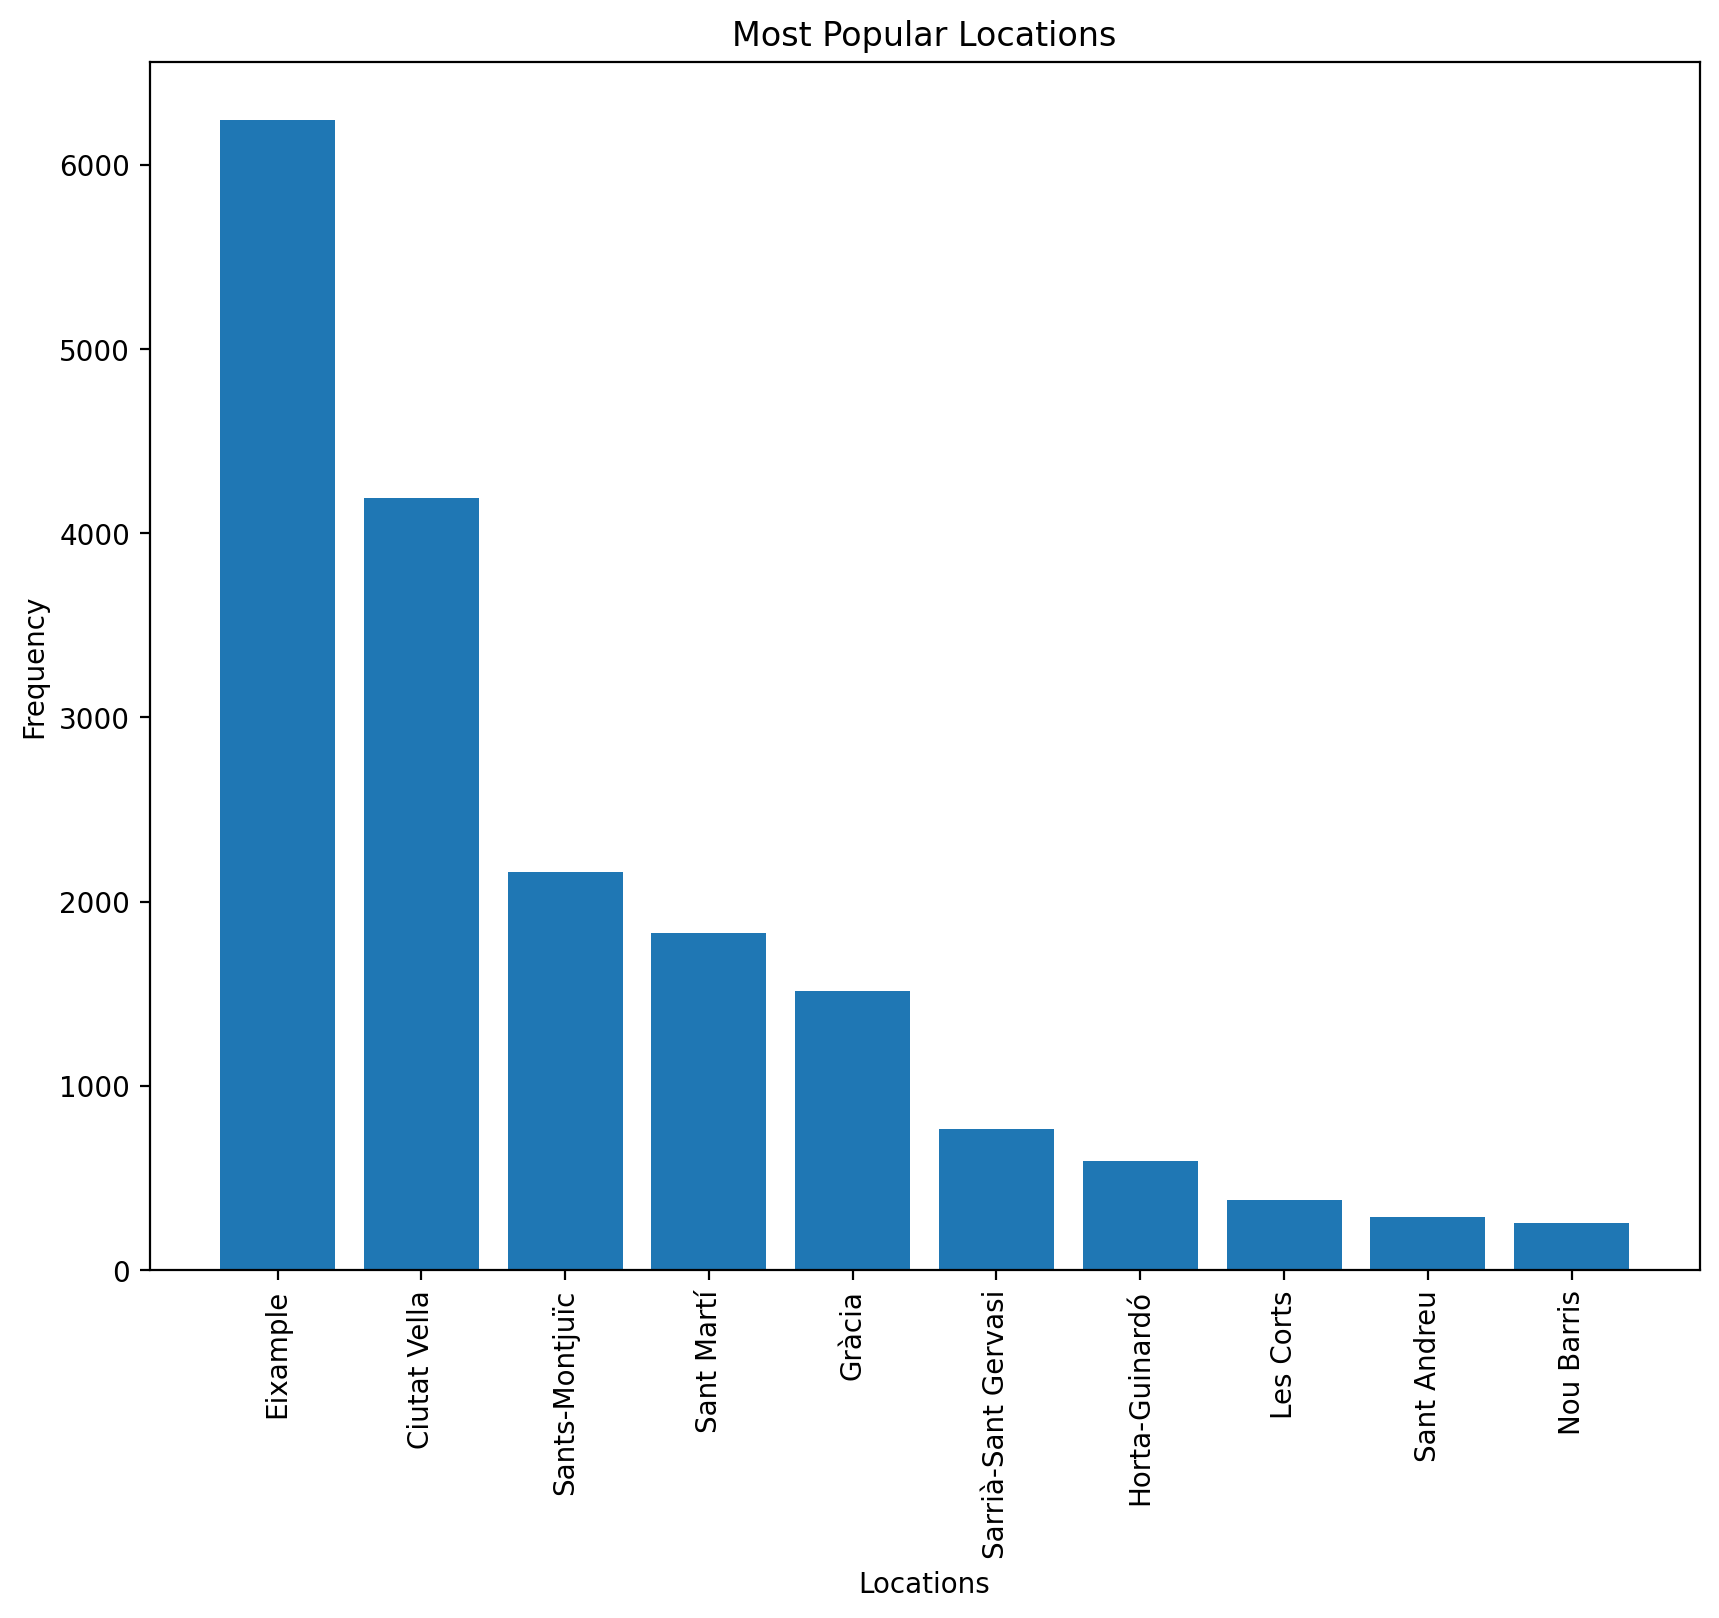

In [20]:
#visulize most frequent location.
plt.figure(figsize=(10,8),dpi=200)
plt.bar(neighbourhood_group[:10].index,neighbourhood_group[:10].values)
plt.title('Most Popular Locations')
plt.xlabel('Locations')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

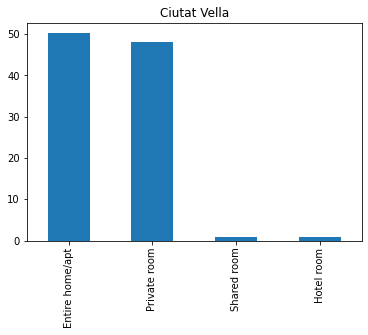

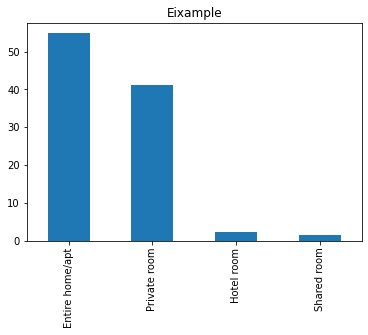

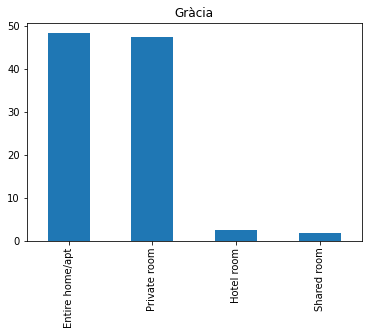

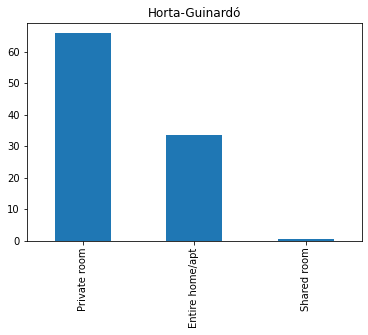

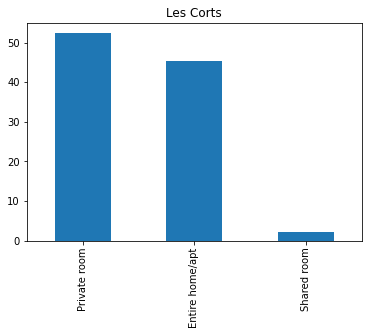

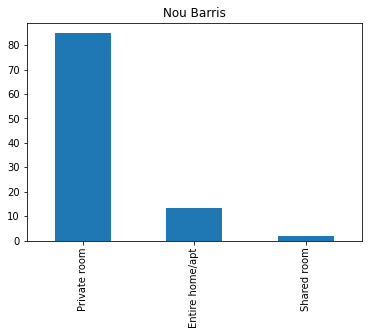

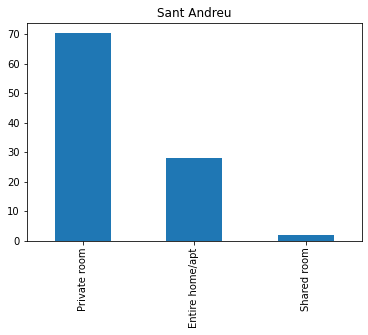

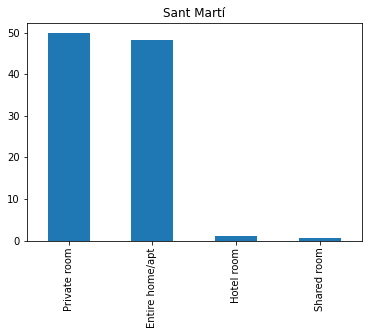

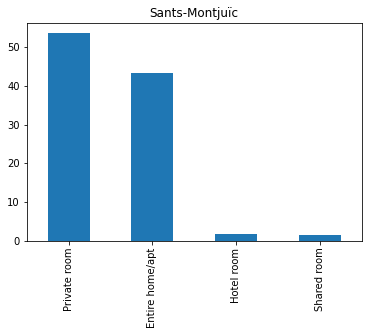

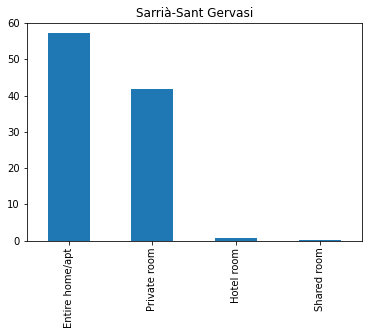

In [21]:
types_of_accomdation=listings_df.groupby('neighbourhood_group')
for group_name, df_group in types_of_accomdation:
  plt.figure()
  plt.title(group_name)
  l=types_of_accomdation.get_group(group_name)['room_type']
  ((l.value_counts())/(len(l))*100).plot(kind='bar')
  plt.show()

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

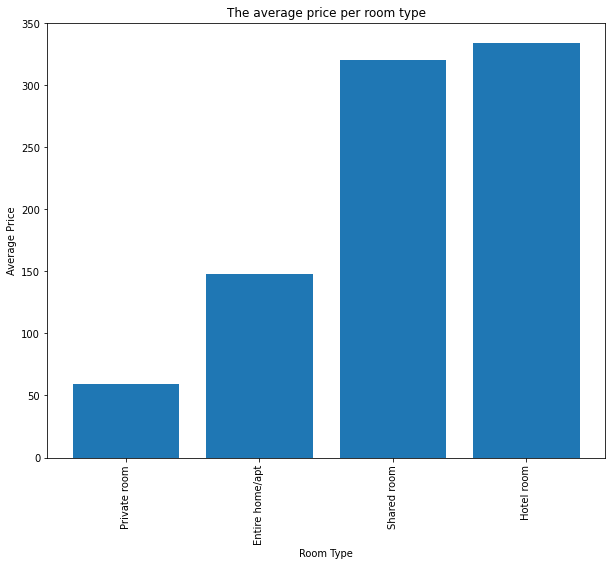

In [22]:
#visulize the price per room type.
price_per_room_type=listings_df.groupby(['room_type']).mean()['price'].sort_values()
plt.figure(figsize=(10,8))
plt.bar(price_per_room_type.index,price_per_room_type.values)
plt.title('The average price per room type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

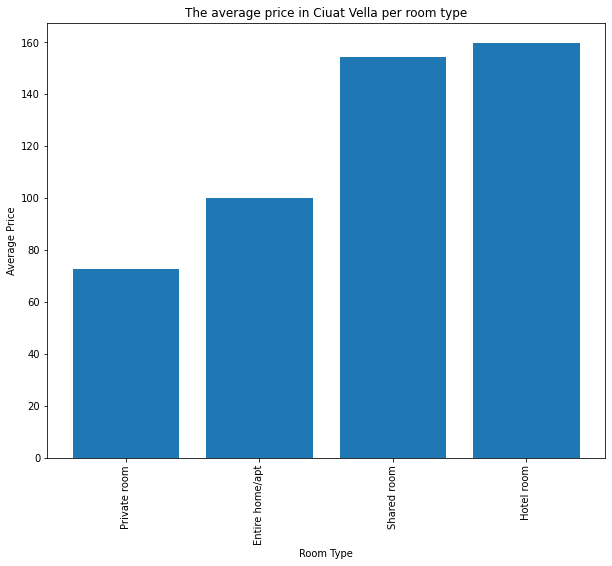

In [37]:
#visulize the price in ciutat vella per room type.
ciutat_listing=listings_df[listings_df['neighbourhood_group']=='Ciutat Vella']
ciutat_per_room_type=ciutat_listing.groupby(['room_type']).mean()['price'].sort_values()
plt.figure(figsize=(10,8))
plt.bar(ciutat_per_room_type.index,ciutat_per_room_type.values)
plt.title('The average price in Ciuat Vella per room type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

**2- Pricing analysis: Most expansive and least expansive Neighbourhood in barcelona?**

In [23]:
least_exp=listings_df.groupby(['neighbourhood_group']).mean()['price'].sort_values()
least_exp[:5]

neighbourhood_group
Nou Barris        42.077821
Horta-Guinardó    62.418919
Sant Andreu       62.937063
Sants-Montjuïc    82.508553
Ciutat Vella      87.800764
Name: price, dtype: float64

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

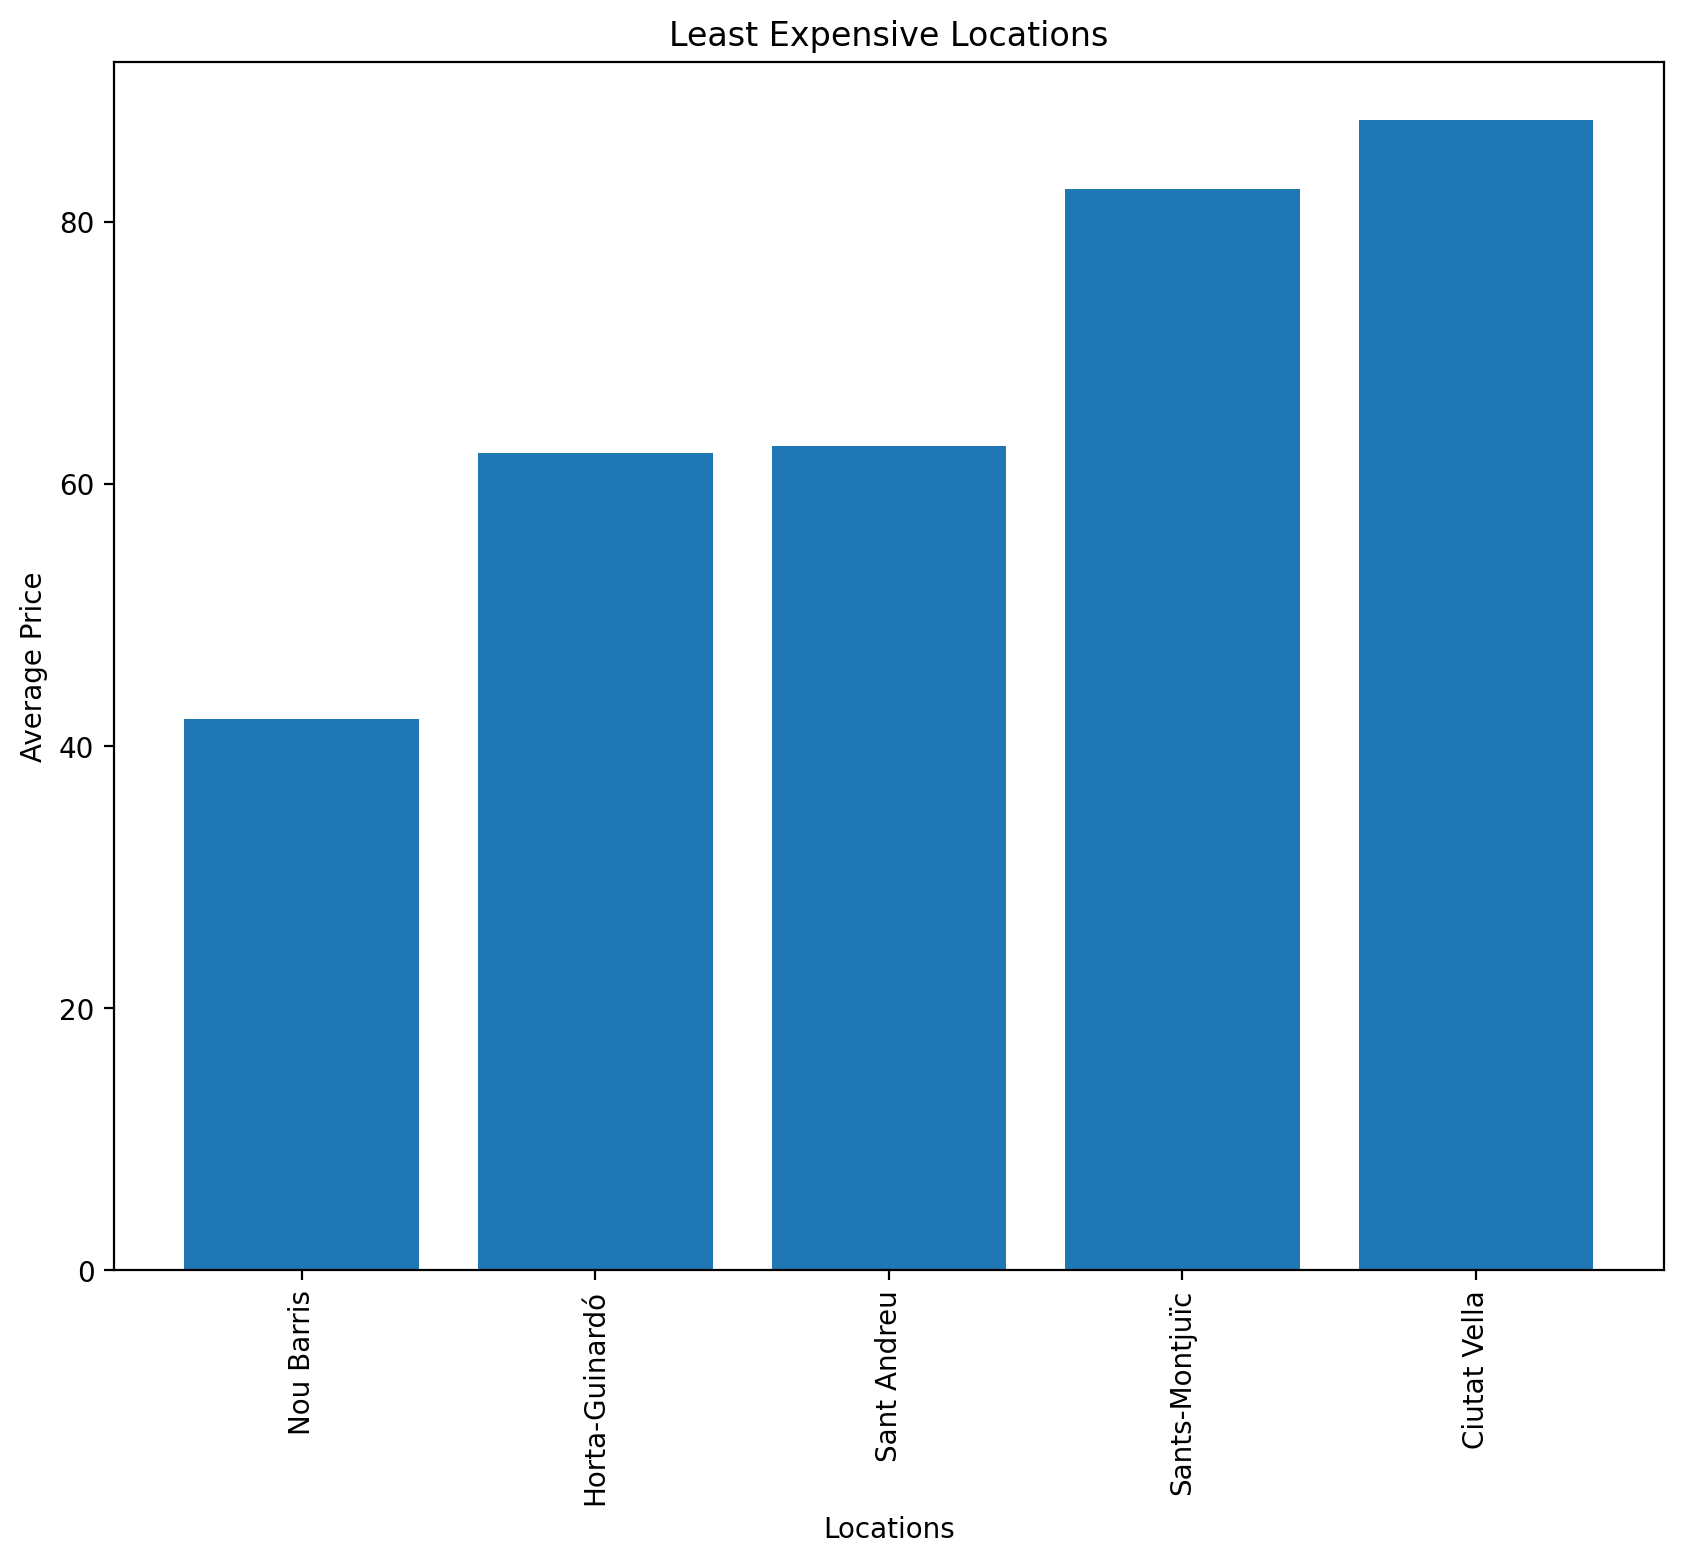

In [24]:
#visulize least expensive location.
plt.figure(figsize=(10,8),dpi=200)
plt.bar(least_exp[:5].index,least_exp[:5].values)
plt.title('Least Expensive Locations')
plt.xlabel('Locations')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

least expansive location is Nou Barris

In [25]:
most_exp=listings_df.groupby(['neighbourhood_group']).mean()['price'].sort_values(ascending=False)
most_exp[:5]

neighbourhood_group
Les Corts              463.797368
Eixample               125.211049
Sant Martí             116.043240
Sarrià-Sant Gervasi    108.058594
Gràcia                  96.646671
Name: price, dtype: float64

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

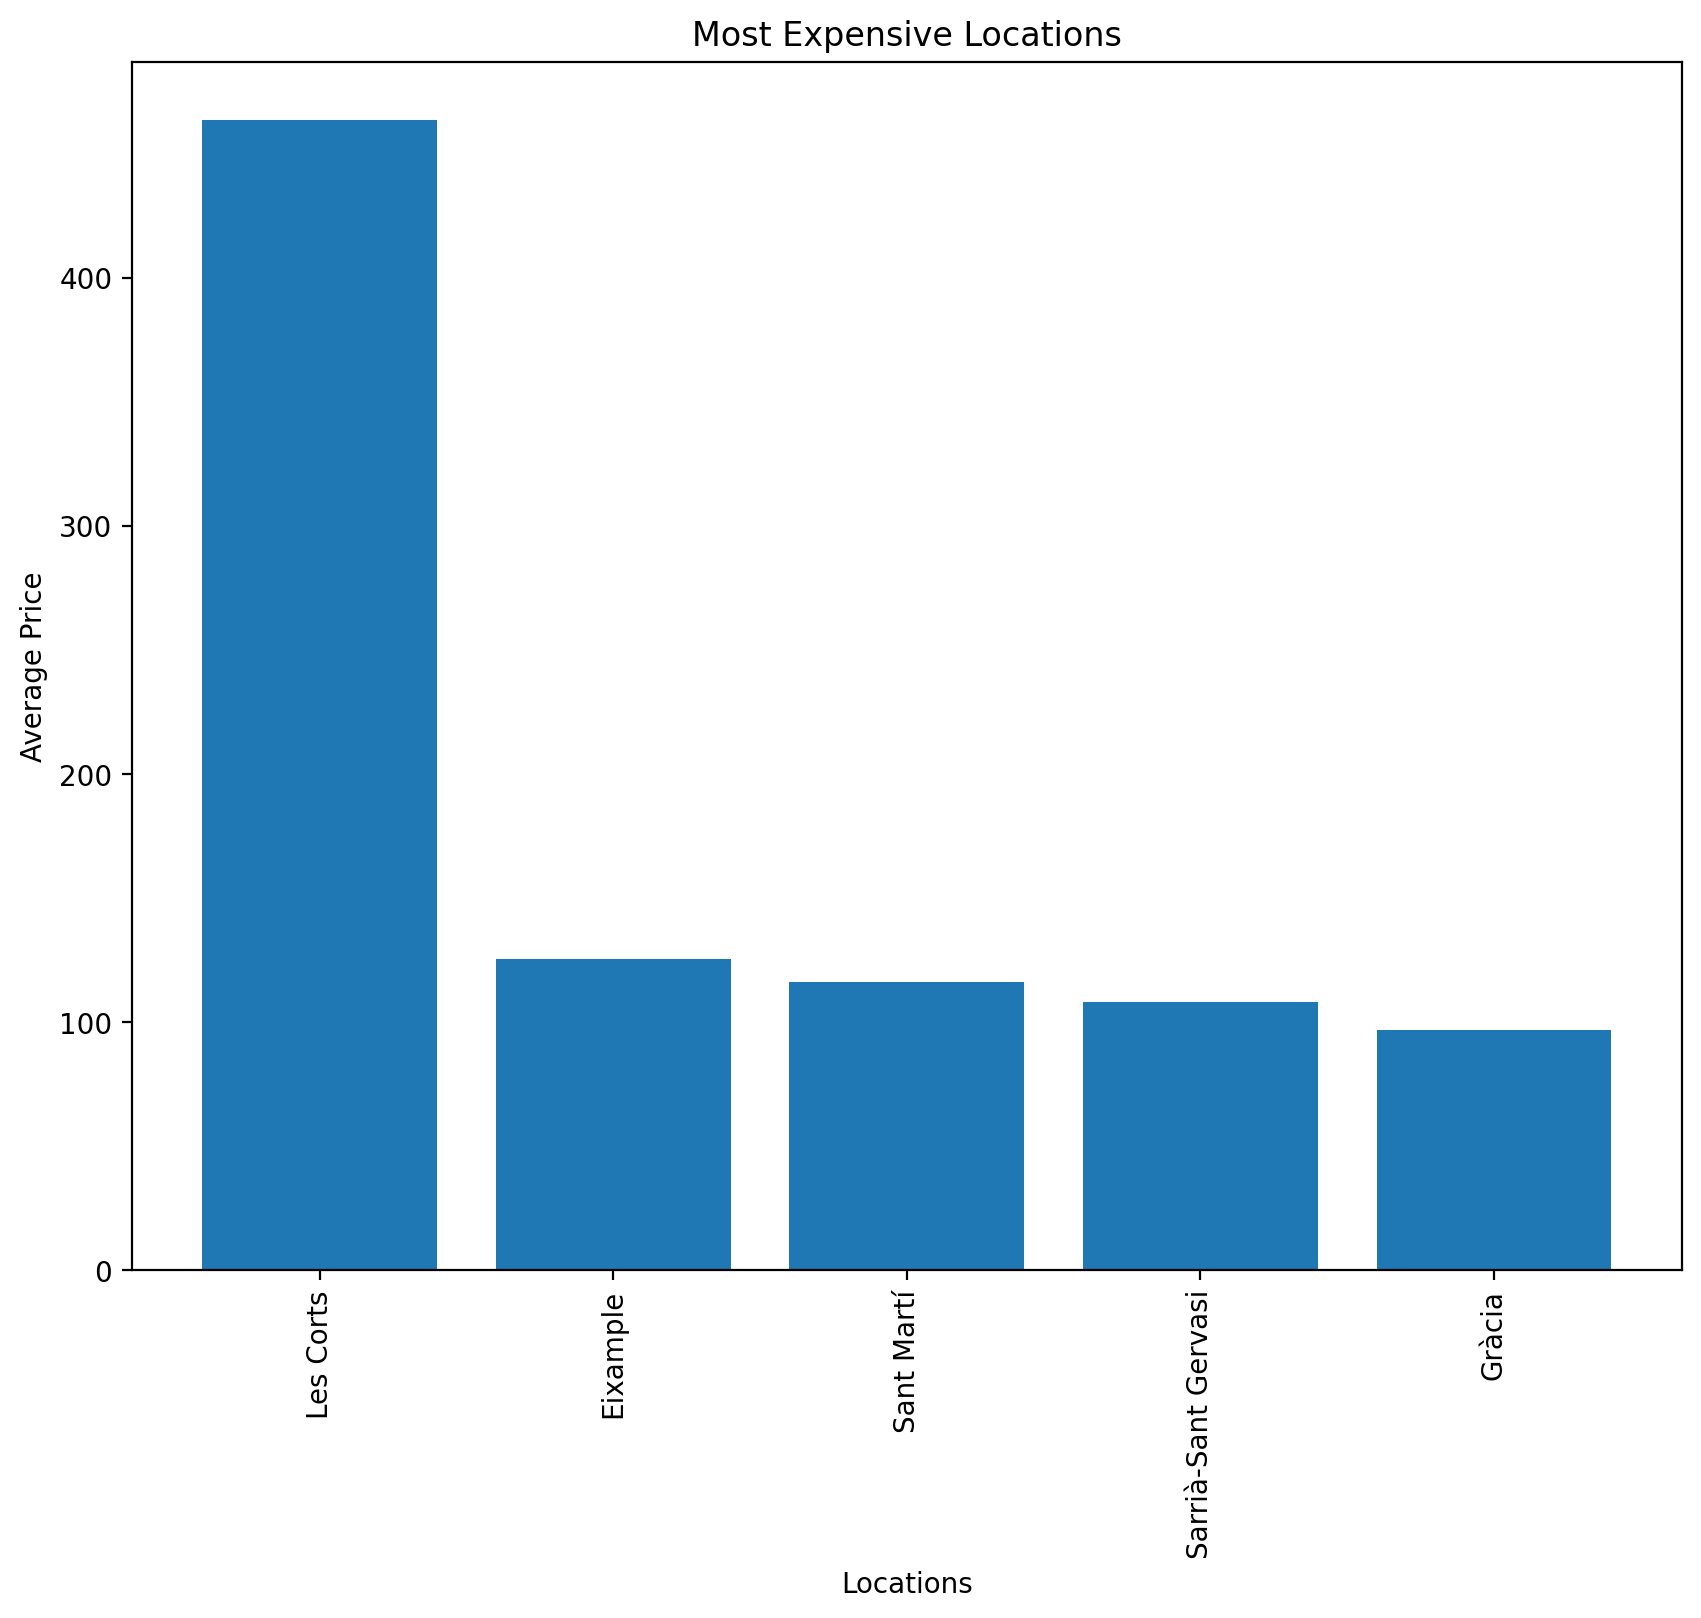

In [26]:
#visulize most expensive location.
plt.figure(figsize=(10,8),dpi=200)
plt.bar(most_exp[:5].index,most_exp[:5].values)
plt.title('Most Expensive Locations')
plt.xlabel('Locations')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

most expensive location is les corts

**3- Seasonal analysis: How increase/decrease price by season?**

In [27]:
calendar_df.loc[:,'Month'] = calendar_df['date'].dt.strftime('%m')
calendar_df.loc[:,'DoW'] = calendar_df['date'].dt.strftime('%A')

In [28]:
#import locale

#locale.setlocale(locale.LC_ALL,'')
#calendar_df['price']=calendar_df.price.map(lambda x: locale.atof(x.strip('$')))

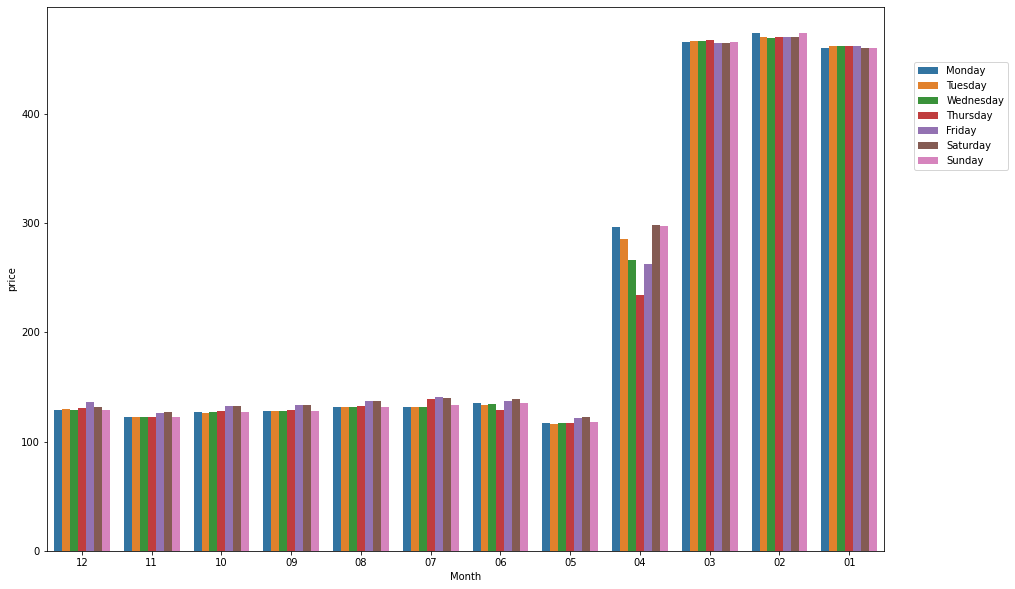

In [29]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
seasonality = calendar_df.groupby(['DoW','Month'])['price'].mean()
seasonality = seasonality.reset_index()
key = seasonality['DoW'].map(mapping)
seasonality =seasonality.iloc[key.argsort()]
seasonality = seasonality.reset_index()
plt.figure(figsize=(15,10))
seasonalityplot = sns.barplot(x="Month", y="price",hue="DoW",
             hue_order=['Monday', 'Tuesday', 'Wednesday', 
                        'Thursday', 'Friday', 'Saturday', 'Sunday'], data=seasonality)
seasonalityplot.legend(loc='center left', bbox_to_anchor=(1.03, 0.8), ncol=1)

plt.show()

the price of week is the same, but the price is high in months: 1,2,3,4 of 2021
and low for months: 12,11,10,9,8,7,6,5 of 2020
this caused by covid19

In [30]:
print(calendar_df.groupby(['Month'])['price'].mean())

Month
01    461.346579
02    471.276233
03    466.168898
04    276.378727
05    118.631349
06    134.734301
07    135.694140
08    133.149539
09    129.532000
10    128.814233
11    123.628364
12    130.868706
Name: price, dtype: float64


In [31]:
print(calendar_df.groupby(['DoW'])['price'].mean())

DoW
Friday       222.596573
Monday       225.033568
Saturday     228.527483
Sunday       225.541673
Thursday     221.386380
Tuesday      224.759667
Wednesday    223.544008
Name: price, dtype: float64


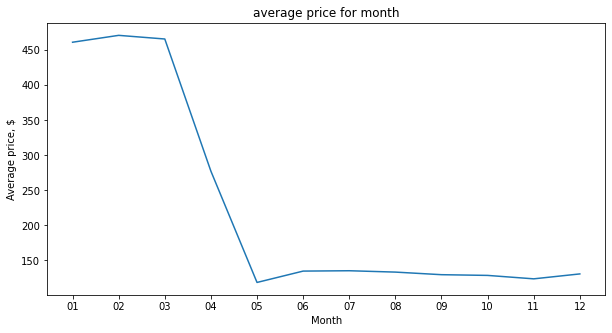

In [32]:
price_by_month = seasonality.groupby(['Month'])['price'].mean()

#plot
plt.figure(figsize=(10,5))
plt.plot(price_by_month)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('average price for month')

plt.savefig('average price for month')

plt.show()

You can see that this visualization is strange, prices are low since May. Don’t forget that we are in a special period. COVID 19 changed everything.  The prices depends on the pandemic situation. For example if there is a lockdown the prices are low. If not, they are high.  So before traveling, it’s better the check the pandemic situation and travel when situation is not dangerous. 

**Conclusion**

This message is not there to tell you to choose the cheapest or highest accommodation. this analysis is the result of a study Barcelona AirBNB I did and that I wanted to share with you in the hope that it will help you if you plan to visit Barcelona one day, indeed the purpose of this study is to help you to organize you according to your needs… . for more information you can visit my git Hub or contact me via linked in